In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import cv2 
import imghdr

In [3]:
data_dir = "cancer_dataset"

In [4]:
os.listdir(data_dir)

['basal_cell_carcinoma',
 'melanoma',
 'not_cancerous',
 'squamous_cell_carcinoma']

In [5]:
for image_class in os.listdir(data_dir):
    print(image_class)

basal_cell_carcinoma
melanoma
not_cancerous
squamous_cell_carcinoma


In [8]:
# one_img_path = cv.imread(os.path.join(data_dir,'MELANOMA', "melanoma_5000.jpg"))

In [10]:
# plt.imshow(one_img_path)

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class,image )
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Eorr Image {}".format(image_path))

In [13]:
dataset = tf.keras.utils.image_dataset_from_directory("cancer_dataset")

Found 1101 files belonging to 4 classes.


In [14]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
dataset_iterator = dataset.as_numpy_iterator()

In [16]:
dataset_iterator

In [17]:
batch = dataset_iterator.next()

In [18]:
batch

(array([[[[1.48606140e+02, 1.36606140e+02, 1.14606140e+02],
          [1.91410889e+02, 1.78166138e+02, 1.56659607e+02],
          [2.21860107e+02, 2.04958130e+02, 1.84909119e+02],
          ...,
          [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 2.57812500e-01, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.98344910e+02, 1.86087097e+02, 1.64860535e+02],
          [2.08273071e+02, 1.95308289e+02, 1.74273071e+02],
          [2.16343140e+02, 2.00483765e+02, 1.80429077e+02],
          ...,
          [3.32336426e-01, 1.33233643e+00, 0.00000000e+00],
          [0.00000000e+00, 2.57812500e-01, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[2.07820312e+02, 1.94820312e+02, 1.75820312e+02],
          [2.12294678e+02, 1.98779053e+02, 1.79779053e+02],
          [2.17345032e+02, 2.01854919e+02, 1.83099976e+02],
          ...,
          [2.51770020e+00, 3.51770020e+00, 5.5389

In [19]:
len(batch)

2

In [20]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
batch[1]

array([1, 1, 2, 3, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3,
       3, 0, 1, 1, 1, 1, 3, 1, 1, 1])

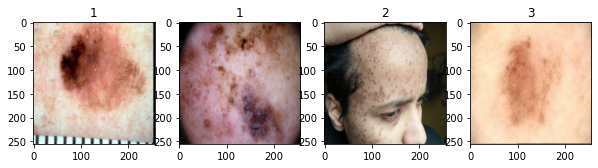

In [23]:
# Mela = 1
fig, ax = plt.subplots(ncols=4, figsize=(10, 10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
batch[0].min()

0.0

In [25]:
scaled = batch[0] / 255

In [26]:
scaled.max()

1.0

In [27]:
data = dataset.map(lambda x,y: (x/255, y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batchD =scaled_iterator.next()

In [30]:
batchD[0].max()

1.0

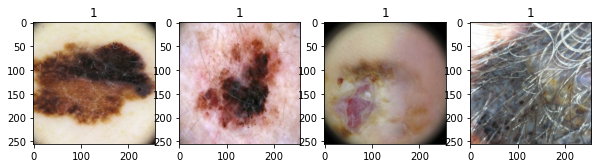

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(10, 10))
for idx, img in enumerate(batchD[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batchD[1][idx])

In [32]:
len(data)

35

In [33]:
27 *.7

18.9

In [34]:
train_size = int(len(data) *.7)
val_size = int(len(data) *.2) +1
test_size = int(len(data) *.1) +1

In [35]:
test_size + val_size +train_size

36

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [37]:
len(test)

3

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D (16, (3,3), 1, activation='relu', input_shape=(256, 256, 3), padding="same", kernel_regularizer= regularizers.l2(0.01) ))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu', padding="same", kernel_regularizer= regularizers.l2(0.01) ))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu', padding="same", kernel_regularizer= regularizers.l2(0.01) ))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu', padding="same", kernel_regularizer= regularizers.l2(0.01)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation= 'relu', kernel_regularizer= regularizers.l2(0.01) ))
model.add(Dropout(0.5))
model.add(Dense(4, activation= 'softmax' ))

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 32)      

In [57]:
logdir = 'logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [59]:
his = model.fit(train, epochs=40, validation_data = val, callbacks= [tensorboard_callback])

Epoch 1/40
24/24 [==============================] - 130s 5s/step - loss: 4.2747 - accuracy: 0.5651 - val_loss: 2.4725 - val_accuracy: 0.6445
Epoch 2/40
24/24 [==============================] - 175s 7s/step - loss: 2.0355 - accuracy: 0.6172 - val_loss: 1.6641 - val_accuracy: 0.6289
Epoch 3/40
24/24 [==============================] - 177s 7s/step - loss: 1.4960 - accuracy: 0.6680 - val_loss: 1.3186 - val_accuracy: 0.7031
Epoch 4/40
24/24 [==============================] - 157s 7s/step - loss: 1.2886 - accuracy: 0.7188 - val_loss: 1.1860 - val_accuracy: 0.7500
Epoch 5/40
24/24 [==============================] - 174s 7s/step - loss: 1.0969 - accuracy: 0.7891 - val_loss: 1.0173 - val_accuracy: 0.7734
Epoch 6/40
24/24 [==============================] - 178s 7s/step - loss: 0.9809 - accuracy: 0.8125 - val_loss: 1.0131 - val_accuracy: 0.7891
Epoch 7/40
24/24 [==============================] - 174s 7s/step - loss: 0.9234 - accuracy: 0.8177 - val_loss: 0.9282 - val_accuracy: 0.8047
Epoch 8/40
24

In [60]:
his.history

{'loss': [4.274692058563232,
  2.0355024337768555,
  1.4959696531295776,
  1.2885557413101196,
  1.096932291984558,
  0.9808745384216309,
  0.9233691692352295,
  0.98981112241745,
  0.8883101940155029,
  0.8371607661247253,
  0.8901560306549072,
  0.8388420939445496,
  0.8015500903129578,
  0.7779483199119568,
  0.7961421012878418,
  0.8360958099365234,
  0.8218119144439697,
  0.7268257737159729,
  0.7250502705574036,
  0.7640097737312317,
  0.7639948725700378,
  0.7681476473808289,
  0.759488046169281,
  0.7368924021720886,
  0.6903035640716553,
  0.7258747220039368,
  0.7088629603385925,
  0.6666498780250549,
  0.6769457459449768,
  0.6692883968353271,
  0.708482027053833,
  0.6816580891609192,
  0.6807711124420166,
  0.6309757232666016,
  0.6113507151603699,
  0.5973485112190247,
  0.645294189453125,
  0.6524918675422668,
  0.6348048448562622,
  0.556319534778595],
 'accuracy': [0.5651041865348816,
  0.6171875,
  0.66796875,
  0.71875,
  0.7890625,
  0.8125,
  0.8177083134651184,
  

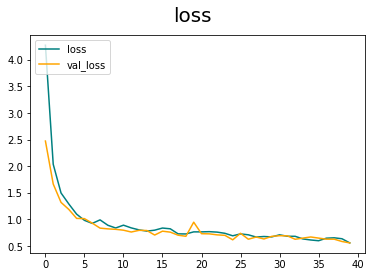

In [61]:
fig = plt.figure()
plt.plot(his.history['loss'], color='teal', label="loss")
plt.plot(his.history['val_loss'], color='orange', label="val_loss")
fig.suptitle('loss', fontsize= 20)
plt.legend(loc = "upper left")
plt.show()

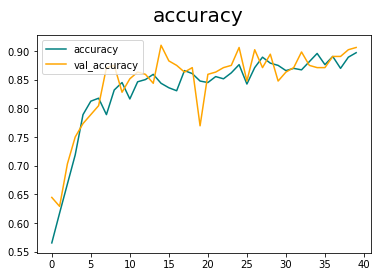

In [63]:
fig = plt.figure()
plt.plot(his.history['accuracy'], color='teal', label="accuracy")
plt.plot(his.history['val_accuracy'], color='orange', label="val_accuracy")
fig.suptitle('accuracy', fontsize= 20)
plt.legend(loc = "upper left")
plt.show()

In [64]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [65]:
pre =Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
scores = model.evaluate(test)

3/3 [==============================] - 6s 710ms/step - loss: 0.6258 - accuracy: 0.8831


In [71]:
class_names = dataset.class_names
class_names

['basal_cell_carcinoma',
 'melanoma',
 'not_cancerous',
 'squamous_cell_carcinoma']

first image to predict
actual label: basal_cell_carcinoma
1/1 [==============================] - 1s 992ms/step
predicted label: basal_cell_carcinoma


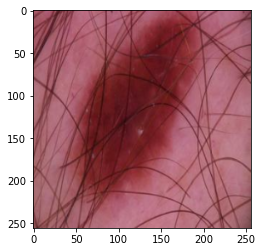

In [73]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    
    first_image = images_batch[0].numpy()
#     first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [74]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 78ms/step


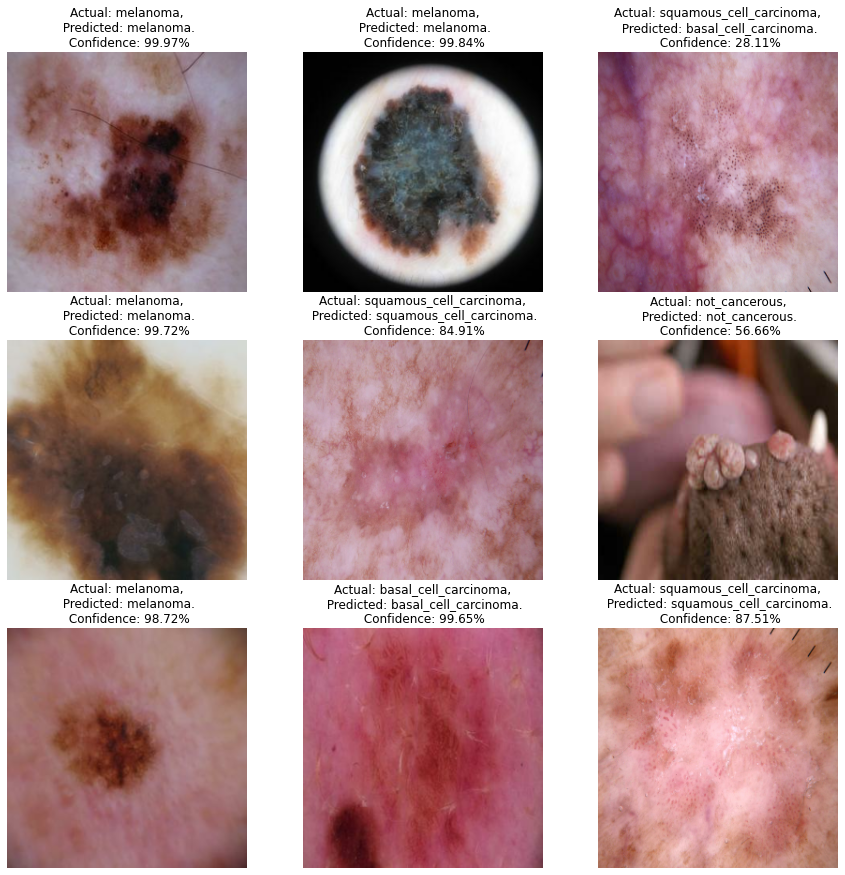

In [84]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
#         plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 74ms/step


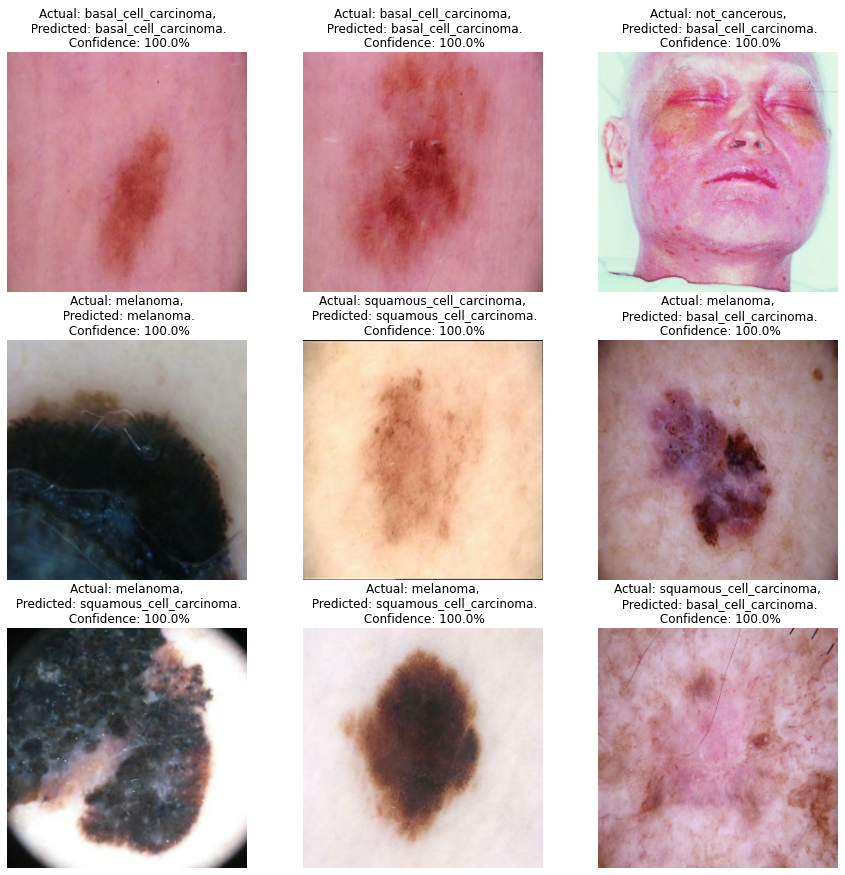

In [85]:
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy())
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")